Multiple methods of plotting sparse 2D grid data in python

Author: Anthony Zamperoni

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.size'] = 14

## Step 1: Load the AEM resistivity data

In [105]:
def read_work_bench_xyz_mod(fname):
    with open(fname, 'r') as fid:
        df = pd.read_csv("2loopedit.csv")


    easting = np.asarray(df.UTME.values)
    northing = np.asarray(df.UTMN.values)
    elev = df.Elevation.values
    residual = np.asarray(df.R.values)
    utm_coords = np.column_stack((easting, northing))
    utm_data = data_utm = np.column_stack((easting,northing,residual))

    # if conversion from utm to lat lon is required:
    import utm
    lat=np.zeros((len(easting),))
    lon=np.zeros((len(northing),))
    i=0
    for x,y in utm_coords:
        X,Y = utm.to_latlon(x, y, 17, 'N')
        lat[i] = X
        lon[i] = Y
        i+=1

    return df, easting, northing, utm_coords, utm_data, residual

In [106]:
file_name = "C:/Users/adzam/Documents/monday_ben/python grid/2Loopedit.csv"
df, easting, northing, utm_coords, utm_data, residual = read_work_bench_xyz_mod(file_name)

In [107]:
df.head(3)

,UTME,UTMN,Elevation,M,T,F,R,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,308838.59,5326586.12,422.20,-0.0111,-0.000646,1.02,-2.18,NaN,NaN,NaN
1,308707.44,5326647.54,422.11,-0.0128,-0.000747,1.02,-1.96,NaN,NaN,NaN
2,308768.76,5326783.05,436.43,-0.0122,-0.000703,1.03,-2.95,NaN,NaN,NaN


In [108]:
easting.shape

(230,)

In [109]:
northing.shape

(230,)

In [110]:
utm_data.shape



(230, 3)

## Step 2: PyGmt Implementation

## Gridding & Interpolation (Blockmean, Blockmedian, Surface)


In [111]:
import pygmt

# define region with max - min extent of coords
utme_min, utme_max = np.amin(easting), np.amax(easting)
utmn_min, utmn_max = np.amin(northing), np.amax(northing)
utm_region =[utme_min, utme_max, utmn_min, utmn_max]



Bmean = pygmt.blockmean(
    data=utm_data, region=utm_region, spacing=["100e"])

Bmean_new = pygmt.blockmedian(
    data=utm_data, region=utm_region, spacing=["60e"])


MeanSurface =pygmt.surface(Bmean, spacing = ['20e'])

MeanSurface_new =pygmt.surface(Bmean, spacing = ['60e'])




blockmean [WARNING]: Unit e is ignored as no axis is geographic
blockmean [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
blockmean [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
blockmean (gmtapi_init_grdheader): Please select compatible -R and -I values
blockmedian [WARNING]: Unit e is ignored as no axis is geographic
blockmedian [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
blockmedian [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
blockmedian (gmtapi_init_grdheader): Please select compatible -R and -I values
surface [WARNING]: Unit e is ignored as no axis is geographic
surface [WARNING]: (x_max-x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
surface [WARNING]: (y_max-y_min) must equal (NY + eps) * y_inc), where NY is an integer and |ep

## Plotting 2D gridded data and station locations in PyGmt (grdimage, makecpt)


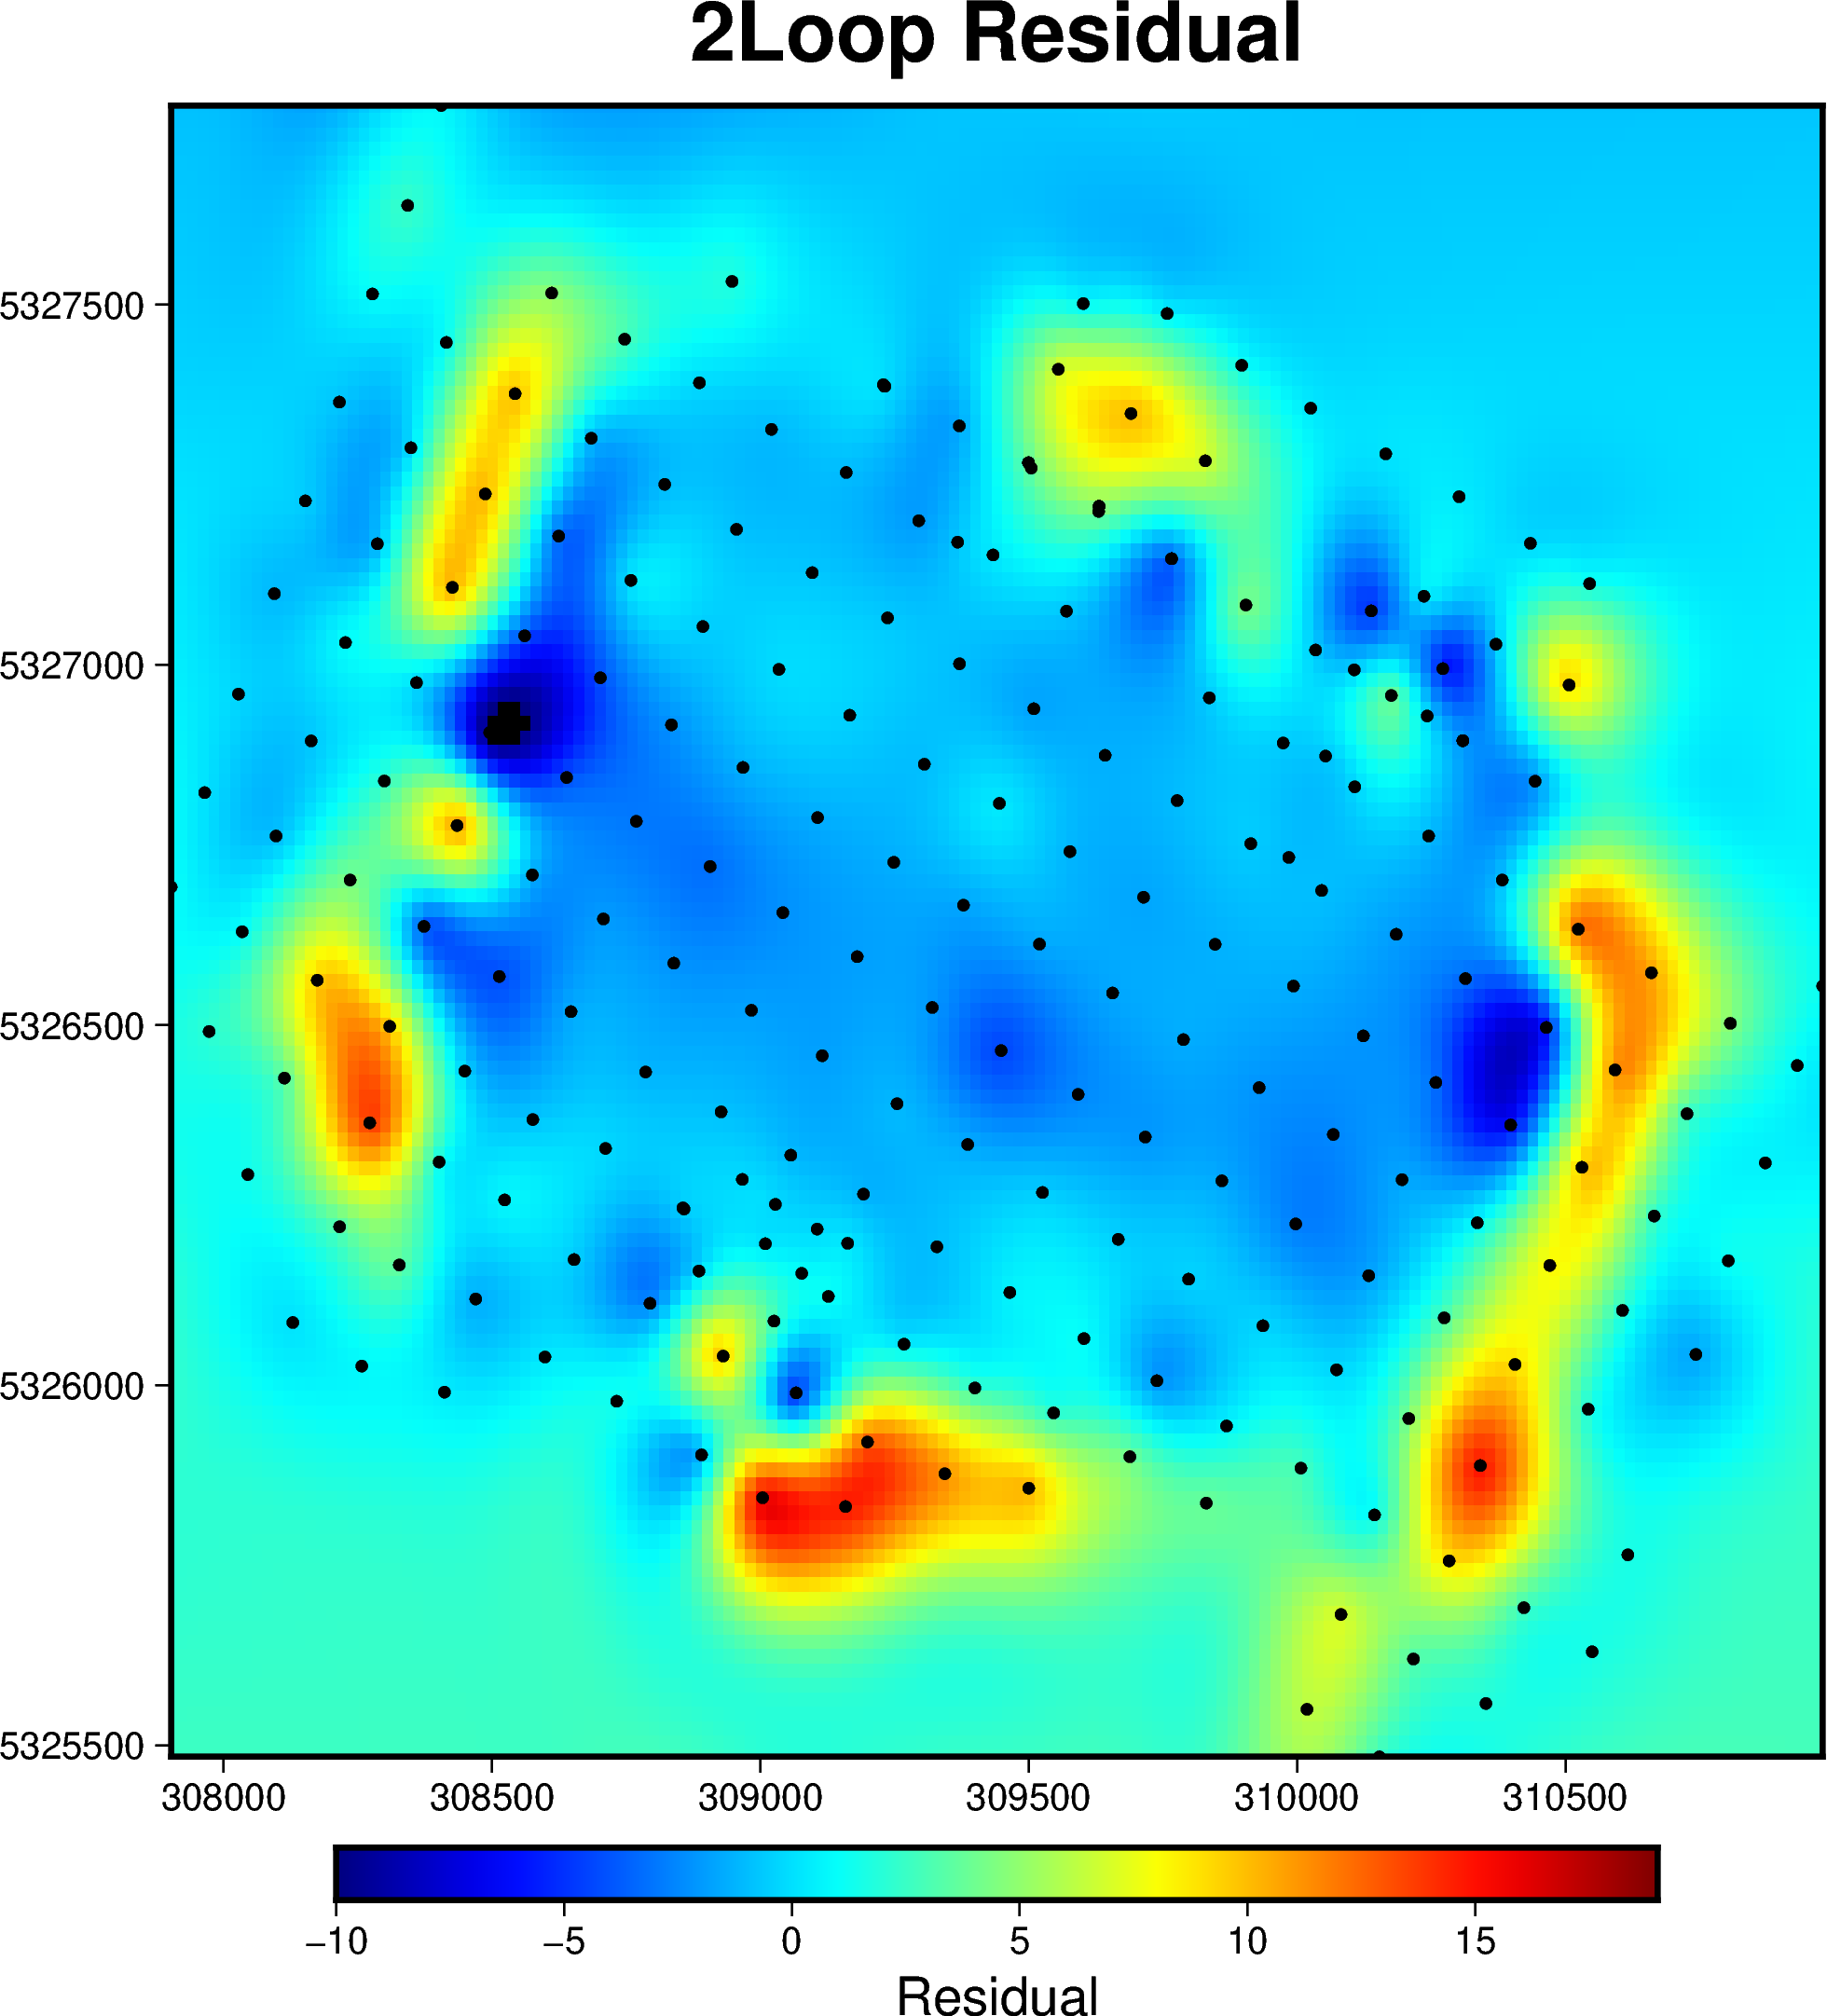

In [112]:
fig = pygmt.Figure()

# create colorbar

ColorBar = pygmt.makecpt(cmap="jet", series="-10/19/1",continuous=True,
    reverse=False,no_bg=False)

#create gridimage to be plotted
fig.grdimage(
    grid=MeanSurface,
    region=utm_region,
    frame=["a",'+t"2Loop Residual"'],
    cmap=ColorBar
)
## This will plot the x,y location of the each station in dataset
fig.plot(x=easting, y=northing,style="c0.1c",color='black',
        pen="black")


# add colorbar to image
fig.colorbar(frame=["a", "x+lResidual"])
#frame=["WSne", "xaf+lx-axis", "yaf+ly-axis"],

fig.show()

## Creating subplots & experimenting with grid spacing

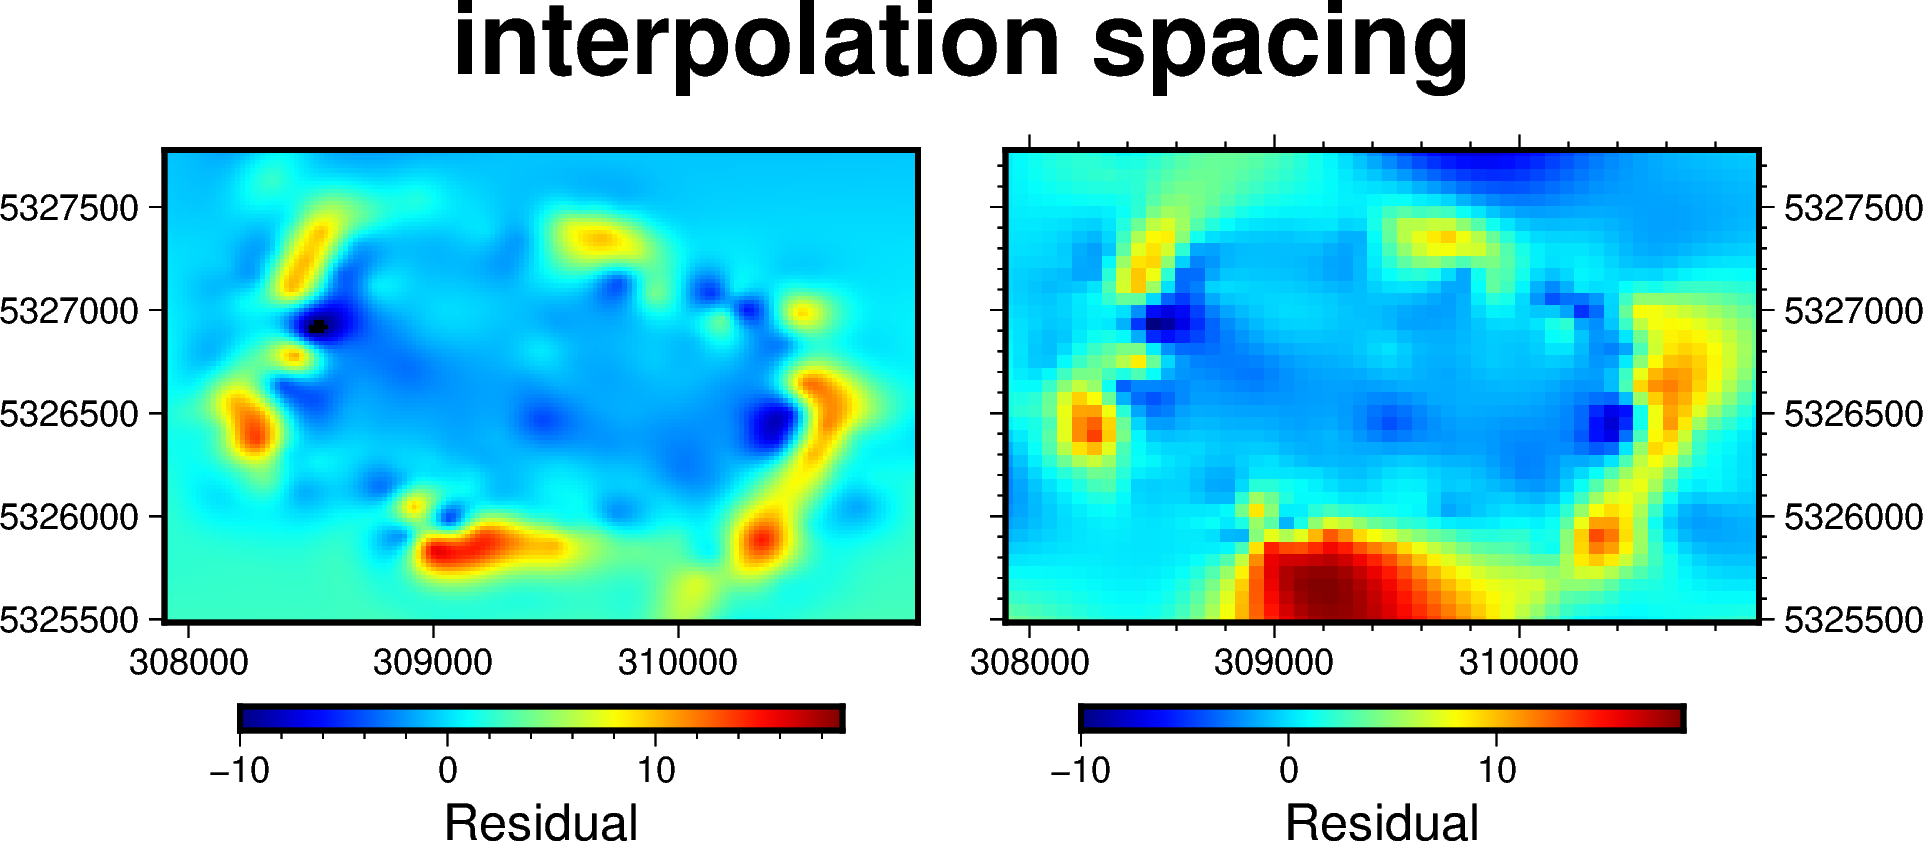

In [113]:
fig = pygmt.Figure()

with fig.subplot(
    nrows=1, ncols=2, figsize=("13.5c", "4c"), title="interpolation spacing"
):
    # Plot 1

    with fig.set_panel(panel=0):
        ColorBar = pygmt.makecpt(cmap="jet", series="-10/19/1",continuous=True,
    reverse=False,no_bg=False)

        fig.grdimage(grid=MeanSurface,region=utm_region,frame=["a"],cmap=ColorBar)
        fig.colorbar(frame=["WSne", "x+lResidual"])
    # Plot a histogram showing the z-value distribution in the original digital
    # elevation model
    with fig.set_panel(panel=1):

        ColorBar = pygmt.makecpt(cmap="jet", series="-10/19/1",continuous=True,
    reverse=False,no_bg=False)

        fig.grdimage(grid=MeanSurface_new,region=utm_region,frame=["wnSE"],cmap=ColorBar)

        fig.colorbar(frame=["a", "x+lResidual"])

fig.show()

## Color bar parameters in PyGmt

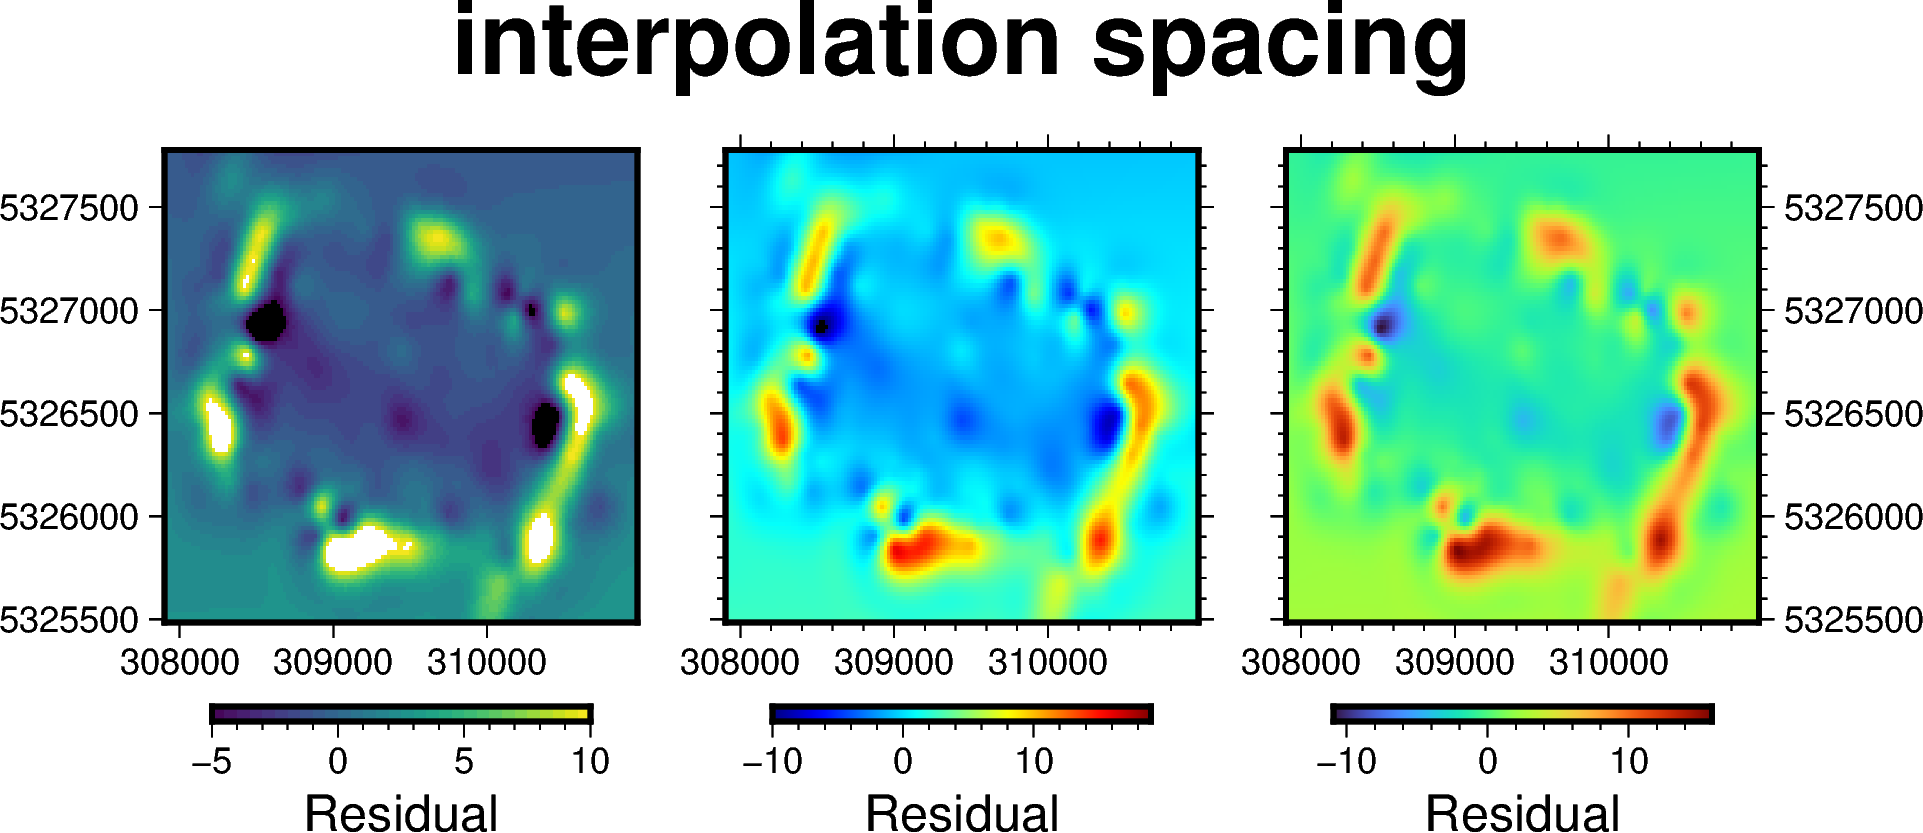

In [114]:
fig = pygmt.Figure()

with fig.subplot(
    nrows=1, ncols=3, figsize=("13.5c", "4c"), title="interpolation spacing"
):
    # Plot 1

    with fig.set_panel(panel=0):
        ColorBar1 = pygmt.makecpt(cmap="jet", series="-10/20/3",continuous=True,
    reverse=False,no_bg=False)

        ColorBar2 = pygmt.makecpt(cmap="jet", series="-5/10/0.5",continuous=True,
    reverse=False,no_bg=False)

        ColorBar3 = pygmt.makecpt(cmap="viridis", series="-5/10/0.5",continuous=False,
    reverse=False,no_bg=False)

        fig.grdimage(grid=MeanSurface,region=utm_region,frame=["a"],cmap=ColorBar2)
        fig.colorbar(frame=["WSne", "x+lResidual"])
    # Plot a histogram showing the z-value distribution in the original digital
    # elevation model
    with fig.set_panel(panel=1):

        ColorBar = pygmt.makecpt(cmap="jet", series="-10/19/1",continuous=True,
    reverse=False,no_bg=False)

        fig.grdimage(grid=MeanSurface,region=utm_region,frame=["wnSe"],cmap=ColorBar1)

        fig.colorbar(frame=["WSne", "x+lResidual"])

    with fig.set_panel(panel=2):

        fig.grdimage(grid=MeanSurface,region=utm_region,frame=["wnSE"],cmap=ColorBar3)

        fig.colorbar(frame=["WSne", "x+lResidual"])

fig.show()

## Step 3 Scipy & Matplotlib implementation

## Gridding & Interpolation (griddata, clim, pcolormesh)

C:\Users\adzam\AppData\Local\Temp\ipykernel_22548\985678485.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


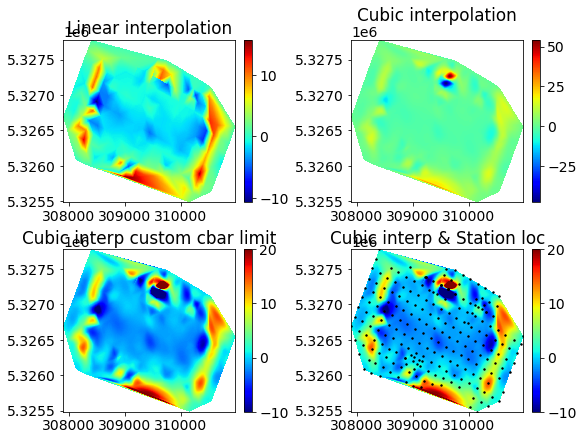

In [123]:
grid_x, grid_y = np.mgrid[utme_min:utme_max:1000j, utmn_min:utmn_max:1000j]

from scipy.interpolate import griddata


LinearGrid = griddata(utm_coords, residual, (grid_x, grid_y), method='linear')
CubicGrid = griddata(utm_coords, residual, (grid_x, grid_y), method='cubic')

fig, ax = plt.subplots(2,2, figsize= (8, 6), constrained_layout= True)
ax = ax.flatten()

PlotData = ax[0].pcolormesh(grid_x, grid_y, LinearGrid, cmap='jet')
fig.colorbar(PlotData,ax=ax[0], orientation='vertical')
ax[0].set_title('Linear interpolation',y=1.08)


PlotData = ax[1].pcolormesh(grid_x, grid_y, CubicGrid, cmap='jet')
fig.colorbar(PlotData,ax=ax[1], orientation='vertical')
ax[1].set_title('Cubic interpolation', y=1.08)

PlotData = ax[2].pcolormesh(grid_x, grid_y, CubicGrid, cmap='jet', clim=(-10,20))
fig.colorbar(PlotData,ax=ax[2], orientation='vertical')
ax[2].set_title('Cubic interp custom cbar limit', y=1.08)

PlotData = ax[3].pcolormesh(grid_x, grid_y, CubicGrid, cmap='jet', clim=(-10,20))
StationLoc = ax[3].scatter(easting, northing, s=2, color='black')
fig.colorbar(PlotData,ax=ax[3], orientation='vertical')
ax[3].set_title('Cubic interp & Station loc', y=1.08)

fig.show()

# plt.figure(figsize=(10, 3.5))
#
# plt.subplot(1, 2, 1)
# plt.imshow(LinearGrid.T,extent=(utme_min,utme_max,utmn_min,utmn_max), origin='lower',cmap='jet')
# plt.colorbar(extend='both')
#
# plt.subplot(1, 2, 2)
# plt.imshow(CubicGrid.T,extent=(utme_min,utme_max,utmn_min,utmn_max), origin='lower',cmap='jet')
# plt.colorbar(extend='both')
#
# plt.show()


## Colorbar options in matplotlib (extend, clim, normalize) * note it is also possible to create custom normalization scheme

C:\Users\adzam\AppData\Local\Temp\ipykernel_22548\257830868.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


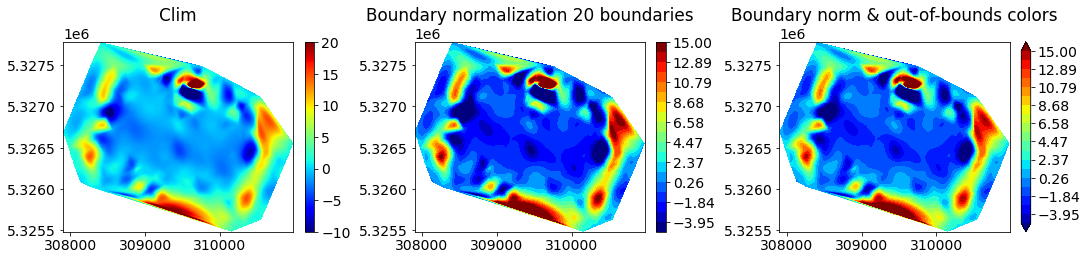

In [124]:
from matplotlib.colors import Normalize, LogNorm, SymLogNorm
import matplotlib.colors as colors

fig, ax = plt.subplots(1,3, figsize= (15, 3.5), constrained_layout= True)

# No normalization
PlotData = ax[0].pcolormesh(grid_x, grid_y, CubicGrid, cmap='jet', clim=(-10,20) )
fig.colorbar(PlotData,ax=ax[0], orientation='vertical')
ax[0].set_title('Clim', y=1.08)

# Boundary normalization

# min value, max value, number of boundaries
bounds = np.linspace(-5,15,20)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
PlotData = ax[1].pcolormesh(grid_x, grid_y, CubicGrid, norm=norm, cmap='jet')
fig.colorbar(PlotData,ax=ax[1], orientation='vertical')
ax[1].set_title('Boundary normalization 20 boundaries', y=1.08)

# Boundary normalization with out-of-bounds colors
bounds = np.linspace(-5,15,20)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
PlotData = ax[2].pcolormesh(grid_x, grid_y, CubicGrid, norm= norm, cmap='jet')
fig.colorbar(PlotData,ax=ax[2], orientation='vertical')
ax[2].set_title('Boundary norm & out-of-bounds colors', y=1.08)
# centered norm

fig.show()